## Data

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('adult.csv', na_values=['#NAME?'])

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df['income'] = [0 if x== '<=50K' else 1 for x in df['income']]

In [5]:
x = df.drop('income', 1)
y = df.income

In [6]:
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [8]:
x['education'].head()

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object

## Dummy Variables

In [ ]:
pd.get_dummies(x['education']).head()
pd.get_dummies(x['marital_status']).head()

In [9]:
pd.get_dummies(x['education']).head()
pd.get_dummies(x['marital_status']).head()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [10]:
#unique categories

for col_name in x.columns:
    if x[col_name].dtypes == 'object':
        unique_cat = len(x[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name = col_name, unique_cat = unique_cat))

Feature 'workclass' has 8 unique categories
Feature 'education' has 17 unique categories
Feature 'marital_status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 6 unique categories
Feature 'sex' has 3 unique categories
Feature 'native_country' has 40 unique categories


In [11]:
x['native_country'].value_counts().sort_values(ascending=False)

United-States                 4465
Mexico                         104
?                               97
Canada                          28
Germany                         22
Philippines                     22
Puerto-Rico                     16
England                         16
El-Salvador                     16
China                           15
Jamaica                         15
Cuba                            14
Dominican-Republic              13
Italy                           12
India                           12
Iran                            11
Vietnam                         10
Guatemala                       10
Taiwan                          10
South                            9
Poland                           9
Japan                            9
Portugal                         7
Greece                           6
Haiti                            6
Nicaragua                        5
Columbia                         5
Trinadad&Tobago                  4
Ireland             

In [12]:
#Cool, so we want to dummy all the catgorical variables

todummy_list = ['workclass',
'education',
'marital_status',
'occupation',
'relationship',
'race',
'sex',
'native_country']

In [13]:
#Before we move on, lets make a lil script to make our live easier

for col_name in x.columns:
    if x[col_name].dtypes == 'object':
        print("'{col_name}',".format(col_name = col_name))

'workclass',
'education',
'marital_status',
'occupation',
'relationship',
'race',
'sex',
'native_country',


In [14]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na = False)
        df = df.drop(x,1)
        df = pd.concat([df, dummies], axis = 1)
    return df

In [15]:
x = dummy_df(x, todummy_list)

## Missing Data

In [18]:
x.isnull().sum().sort_values(ascending=False).head()

fnlwgt                     107
education_num               57
age                         48
occupation_Adm-clerical      0
education_Prof-school        0
dtype: int64

In [19]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='median', axis = 0)
imp.fit(x)
x = pd.DataFrame(data = imp.transform(x), columns=x.columns)

In [20]:
x.isnull().sum().sort_values(ascending=False).head()

native_country_Yugoslavia    0
education_HS-grad            0
education_Preschool          0
education_Prof-school        0
education_Some-college       0
dtype: int64

## Exploring data
### Outlier Data
- Could be either natural (really rich people) or error (error in measurement, maybe scale is broken)


Tukey IQR
- Tukey:
    - Identifies extreme values in data
    - Values below Q1 - 1.5(Q3-Q1) or above Q3 + 1.5(Q3-Q1)

In [23]:
def finding_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indicies = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indicies])
    return outlier_indicies, outlier_values

In [26]:
tukey_indicies, tukey_values = finding_outliers_tukey(x['age'])
np.sort(tukey_values)

array([76., 76., 76., 76., 76., 76., 76., 76., 76., 77., 77., 77., 77.,
       77., 78., 78., 79., 79., 79., 80., 80., 80., 81., 81., 81., 81.,
       82., 88., 90., 90., 90., 90., 90., 90., 90.])

Kernel Density Estimation
- Tukey is extreme values, but KDE captures outliers in even bimodal distributions!

In [28]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float,x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott', fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [29]:
kde_indices, kde_values = find_outliers_kde(x['age'])
np.sort(kde_values)

array([68., 68., 68., 68., 68., 68., 68., 68., 68., 68., 68., 68., 68.,
       68., 68., 68., 68., 68., 69., 69., 69., 69., 69., 69., 69., 69.,
       69., 69., 69., 69., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
       70., 71., 71., 71., 71., 71., 71., 71., 71., 71., 71., 72., 72.,
       72., 72., 72., 72., 72., 72., 72., 72., 72., 72., 73., 73., 73.,
       73., 73., 73., 73., 74., 74., 74., 74., 74., 74., 74., 74., 74.,
       74., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75., 75.,
       76., 76., 76., 76., 76., 76., 76., 76., 76., 77., 77., 77., 77.,
       77., 78., 78., 79., 79., 79., 80., 80., 80., 81., 81., 81., 81.,
       82., 88., 90., 90., 90., 90., 90., 90., 90.])

In [32]:
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color = 'gray', alpha = 0.5)
    plt.title("Histogram of {var_name}".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel('Frequency')
    plt.show()

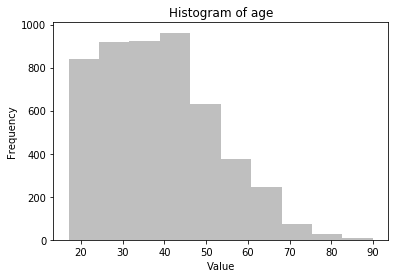

In [33]:
plot_histogram(x['age'])

In [38]:
def plot_histogram(x,y):
    plt.hist(list(x[y==0]), alpha = 0.5, label= 'DV=0')
    plt.hist(list(x[y==1]), alpha = 0.5, label= 'DV=1')
    plt.title("Histogram of {var_name}".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel('Frequency')
    plt.legend(loc = 'best')
    plt.show()

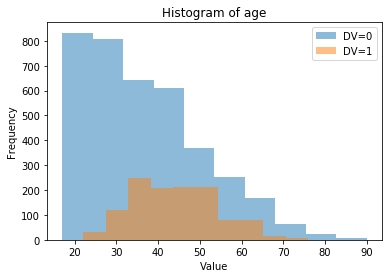

In [39]:
plot_histogram(x['age'],y)

## Feature Engineering